# Correlation between set demand and actual demand

In [1]:
import pandas as pd
import seaborn as sns
import pylab as plt

In [22]:
DATA_DIR = 'data'
DSV_CUMULATIVE = f'{DATA_DIR}/drinks-storage-grafana-crates-cumulative.dsv'
DSV_DEMAND = f'{DATA_DIR}/drinks-storage-order-git-demand.dsv'
DSV_DROP_NAMES = ['mio_guarana']

In [23]:
# Total number of crates drunk since 2018-10
dfc = pd.read_csv(DSV_CUMULATIVE, sep=';')
dfcn = dfc['count'] / dfc['count'].max() # Normalize to [0, 1]

# Current demand in crates (from order script's config)
dfd = pd.read_csv(DSV_DEMAND, sep=';')
dfdn = dfd['count'] / dfd['count'].max() # Normalize to [0, 1]

In [24]:
st = dfcn / dfdn
stn = ((st - st.min()) / st.max() - .5) * 2 # Normalize to [-1, 1]
dftn = pd.concat([dfc['name'], stn], axis=1)

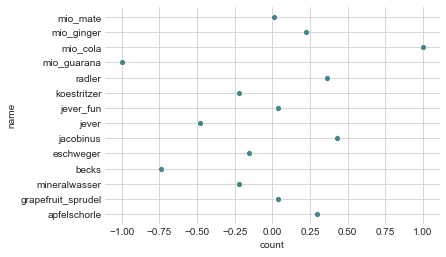

In [25]:
sns.scatterplot(y='name', x='count', data=dftn)
plt.show()

The above plot reflects how much a drink's set demand corresponds to its actual demand. Higher numbers signify higher correlation (good), lower numbers signify lower correlation (bad).